In [197]:
import matplotlib.pyplot as plt
import json
from analysis.aoi.parameters import RATE
import numpy as np

In [198]:
with open('../../../results/aoi/aoi_128B_D0.json', 'rb') as fin:
    core_1_series = json.load(fin)
    
with open('../../../results/aoi/aoi_cores.json', 'rb') as fin:
    core_2_series = json.load(fin)

In [199]:
def plot_bars(core_1, core_2):
    n_plots = len(core_1.keys())
    fig, axes = plt.subplots(n_plots, 1, figsize=(20, 5 * n_plots))
        
    for key, ax in zip(core_1.keys(), axes):
        ax.set_title(f'{key}')
        x_ticks = np.arange(0, len(RATE) * 2, 2)
        ax.bar(x_ticks - 0.4, height=core_1[key], width=0.7, label='1-core')
        ax.bar(x_ticks + 0.4, height=core_2[key], width=0.7, label='2-cores')
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(RATE)
        ax.legend()
        # ax.set_yscale('log')
    plt.show()


## Median AoI

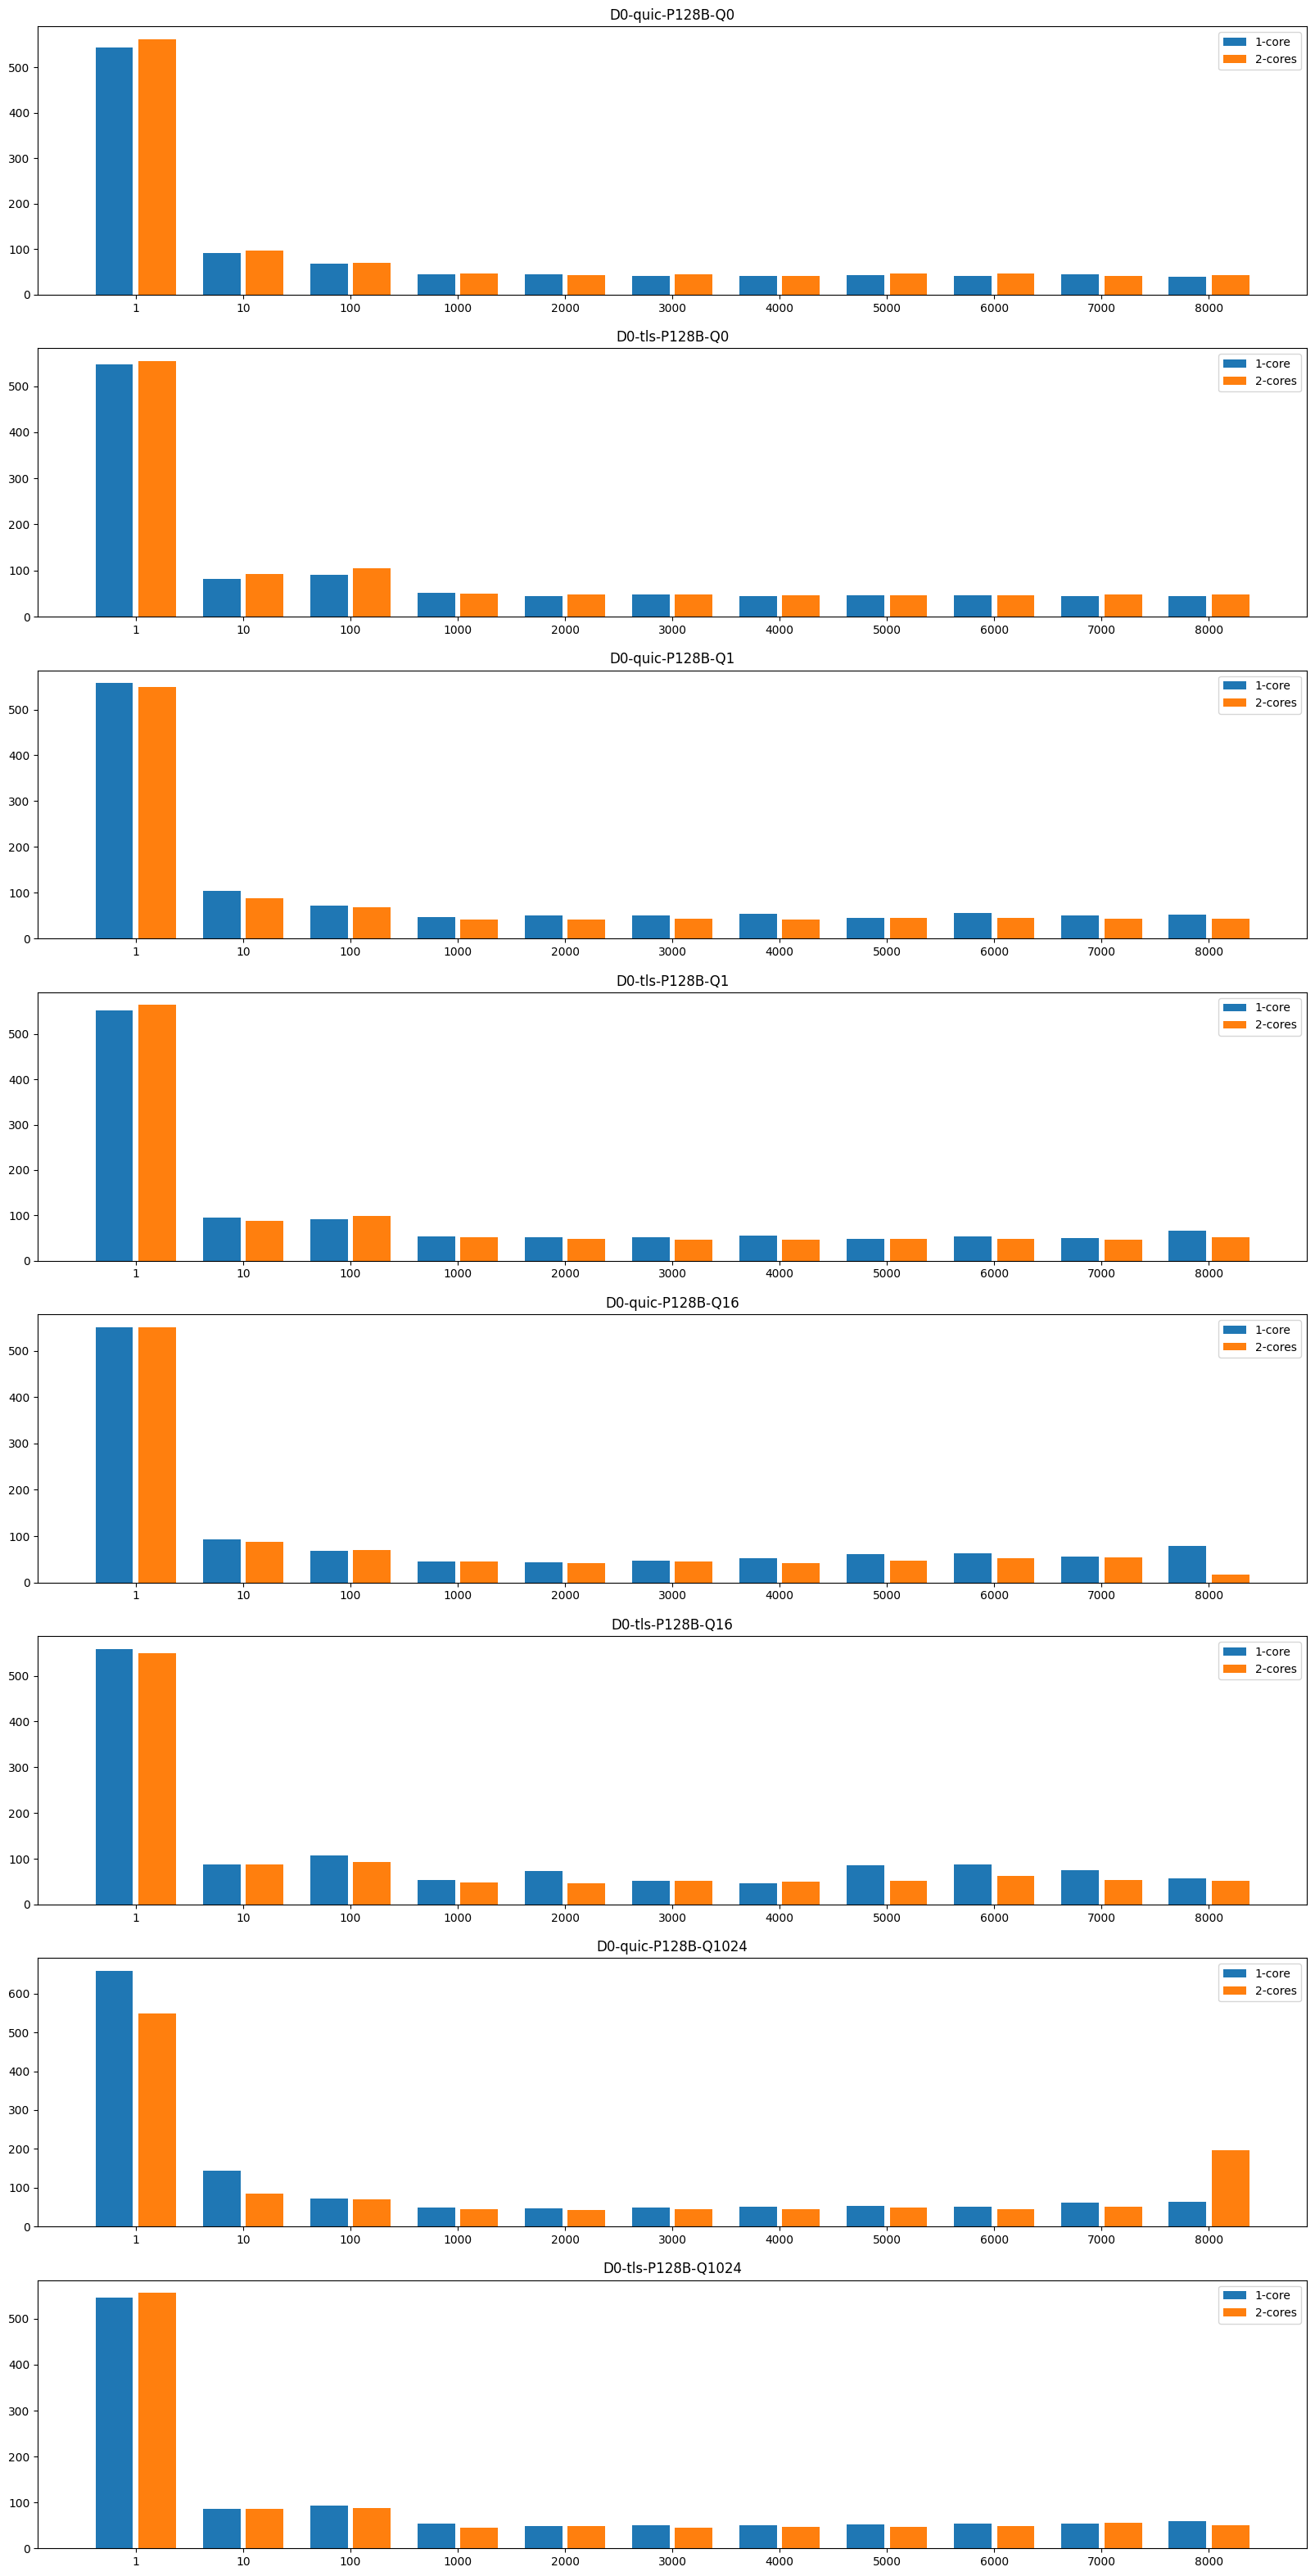

In [200]:
plot_bars(
    {key: core_1_series['median_aoi'][key][0] for key in core_1_series['median_aoi'].keys()},
    {key: core_2_series['median_aoi'][key][0] for key in core_1_series['median_aoi'].keys()}
)

## Energy

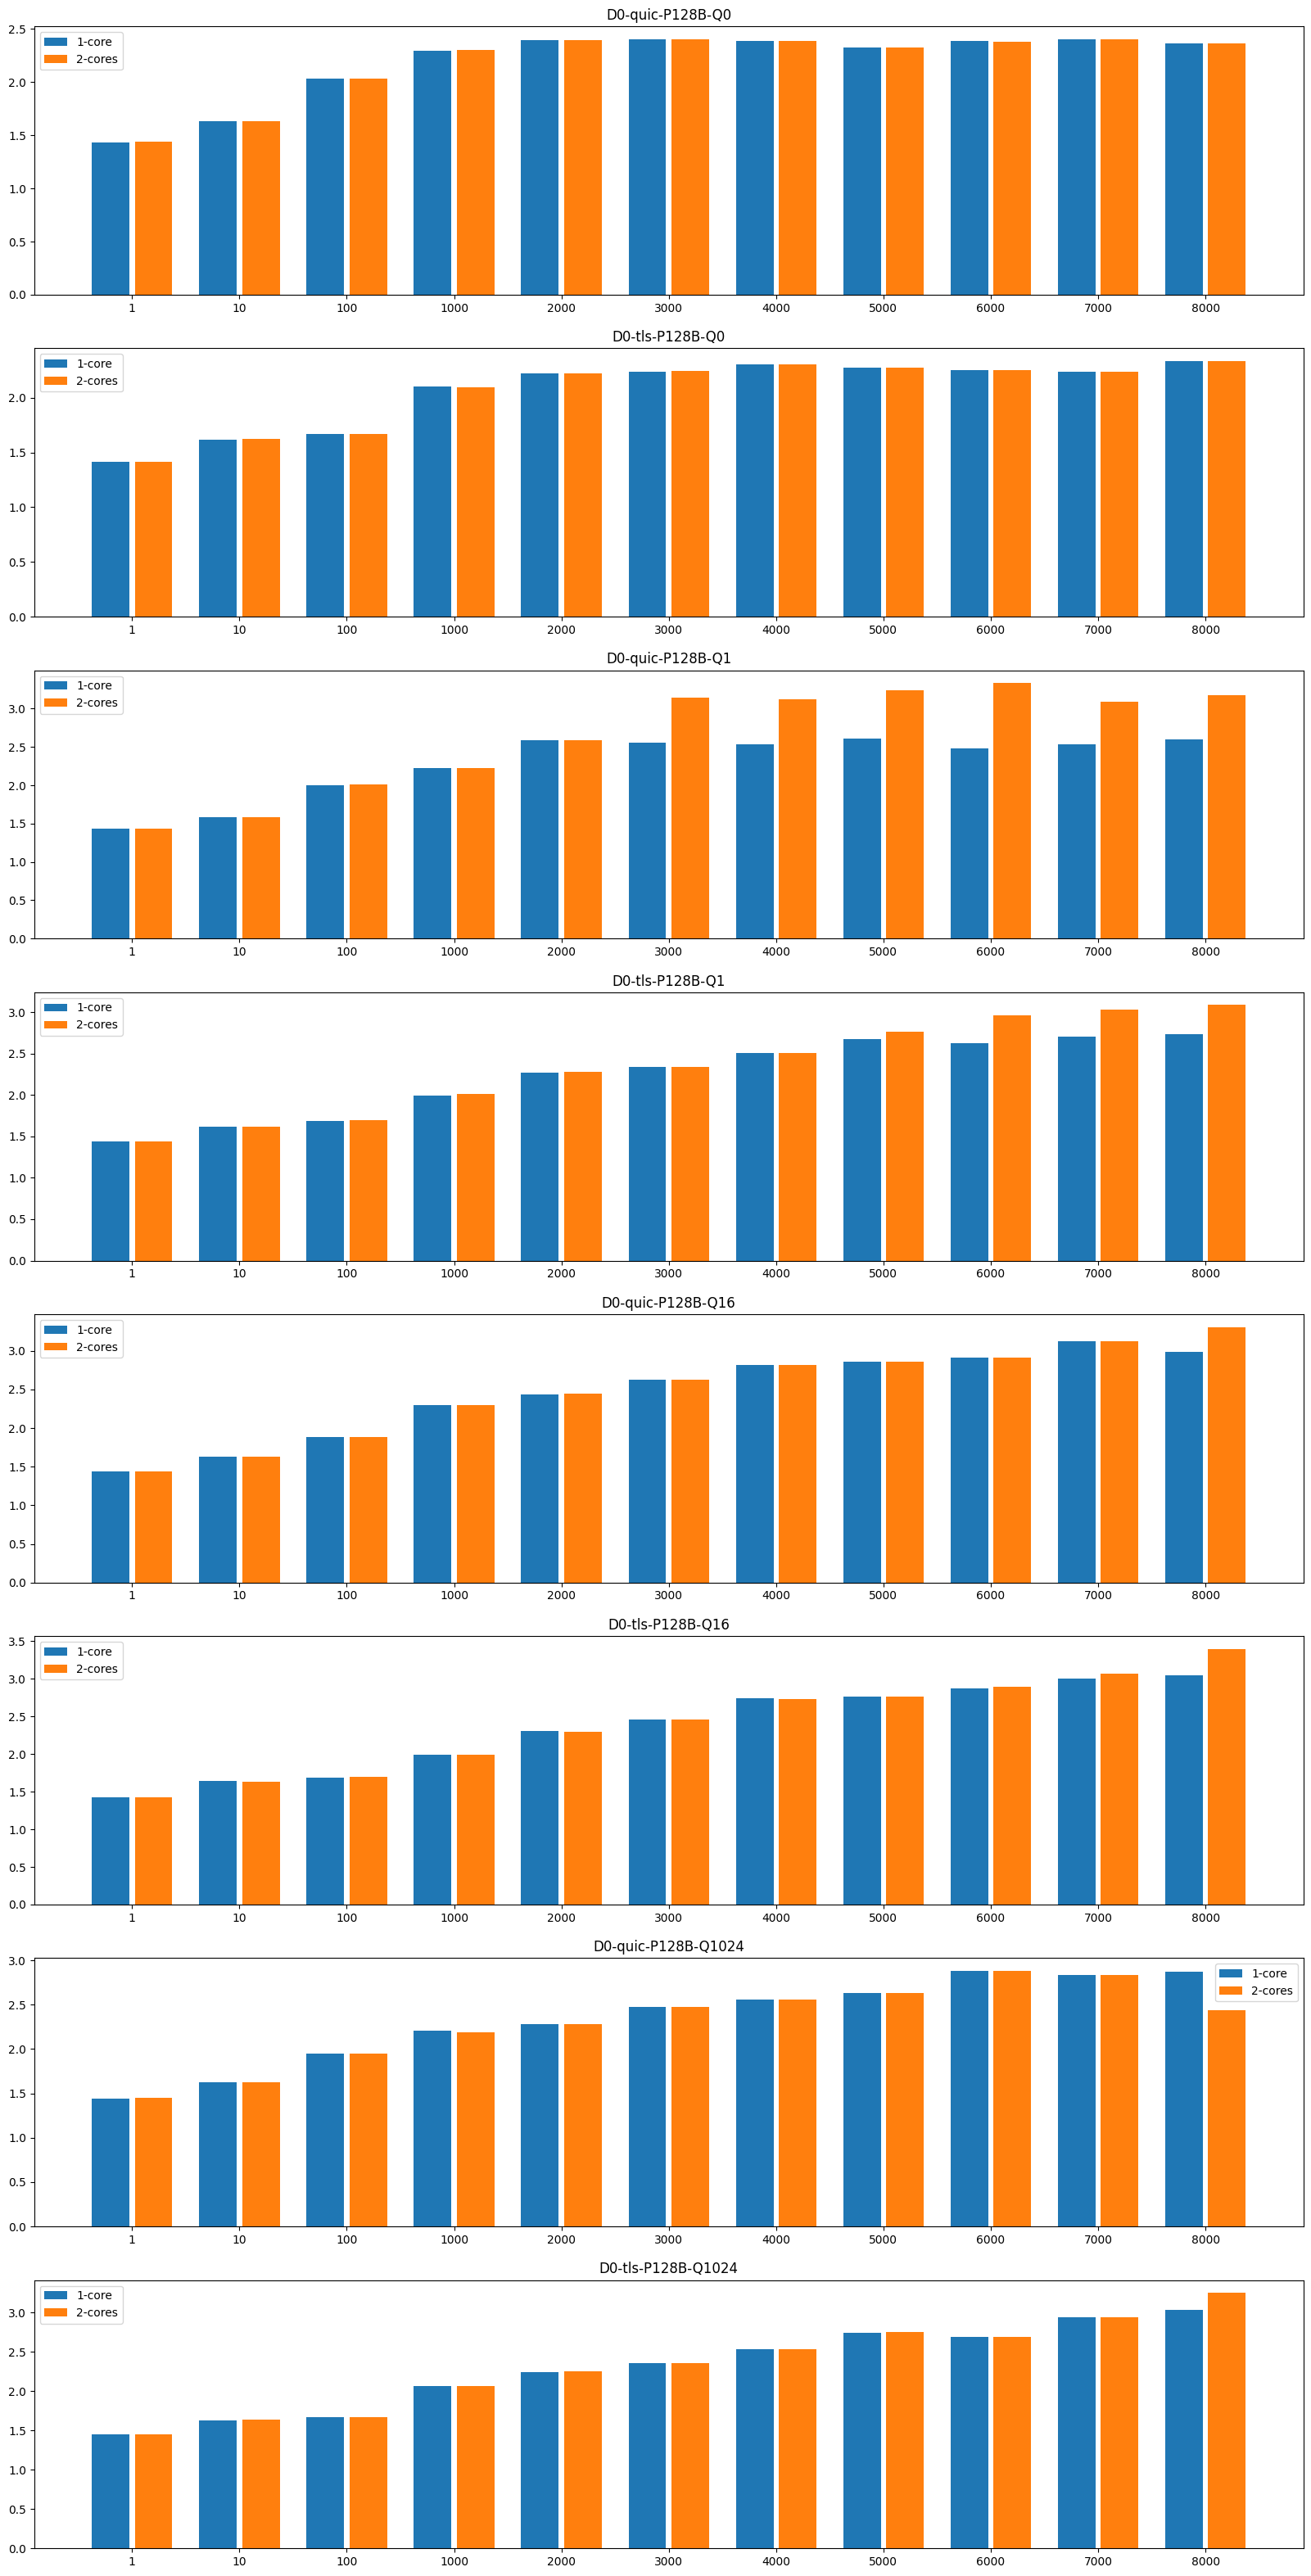

In [204]:
plot_bars(
    {key: [energy/time for (energy, time) in zip(core_1_series['energy'][key][0], core_1_series['time'][key][0])] for key in core_1_series['energy'].keys()},
    {key: [energy/time for (energy, time) in zip(core_1_series['energy'][key][0], core_2_series['time'][key][0])] for key in core_2_series['energy'].keys()}
)

## Rate

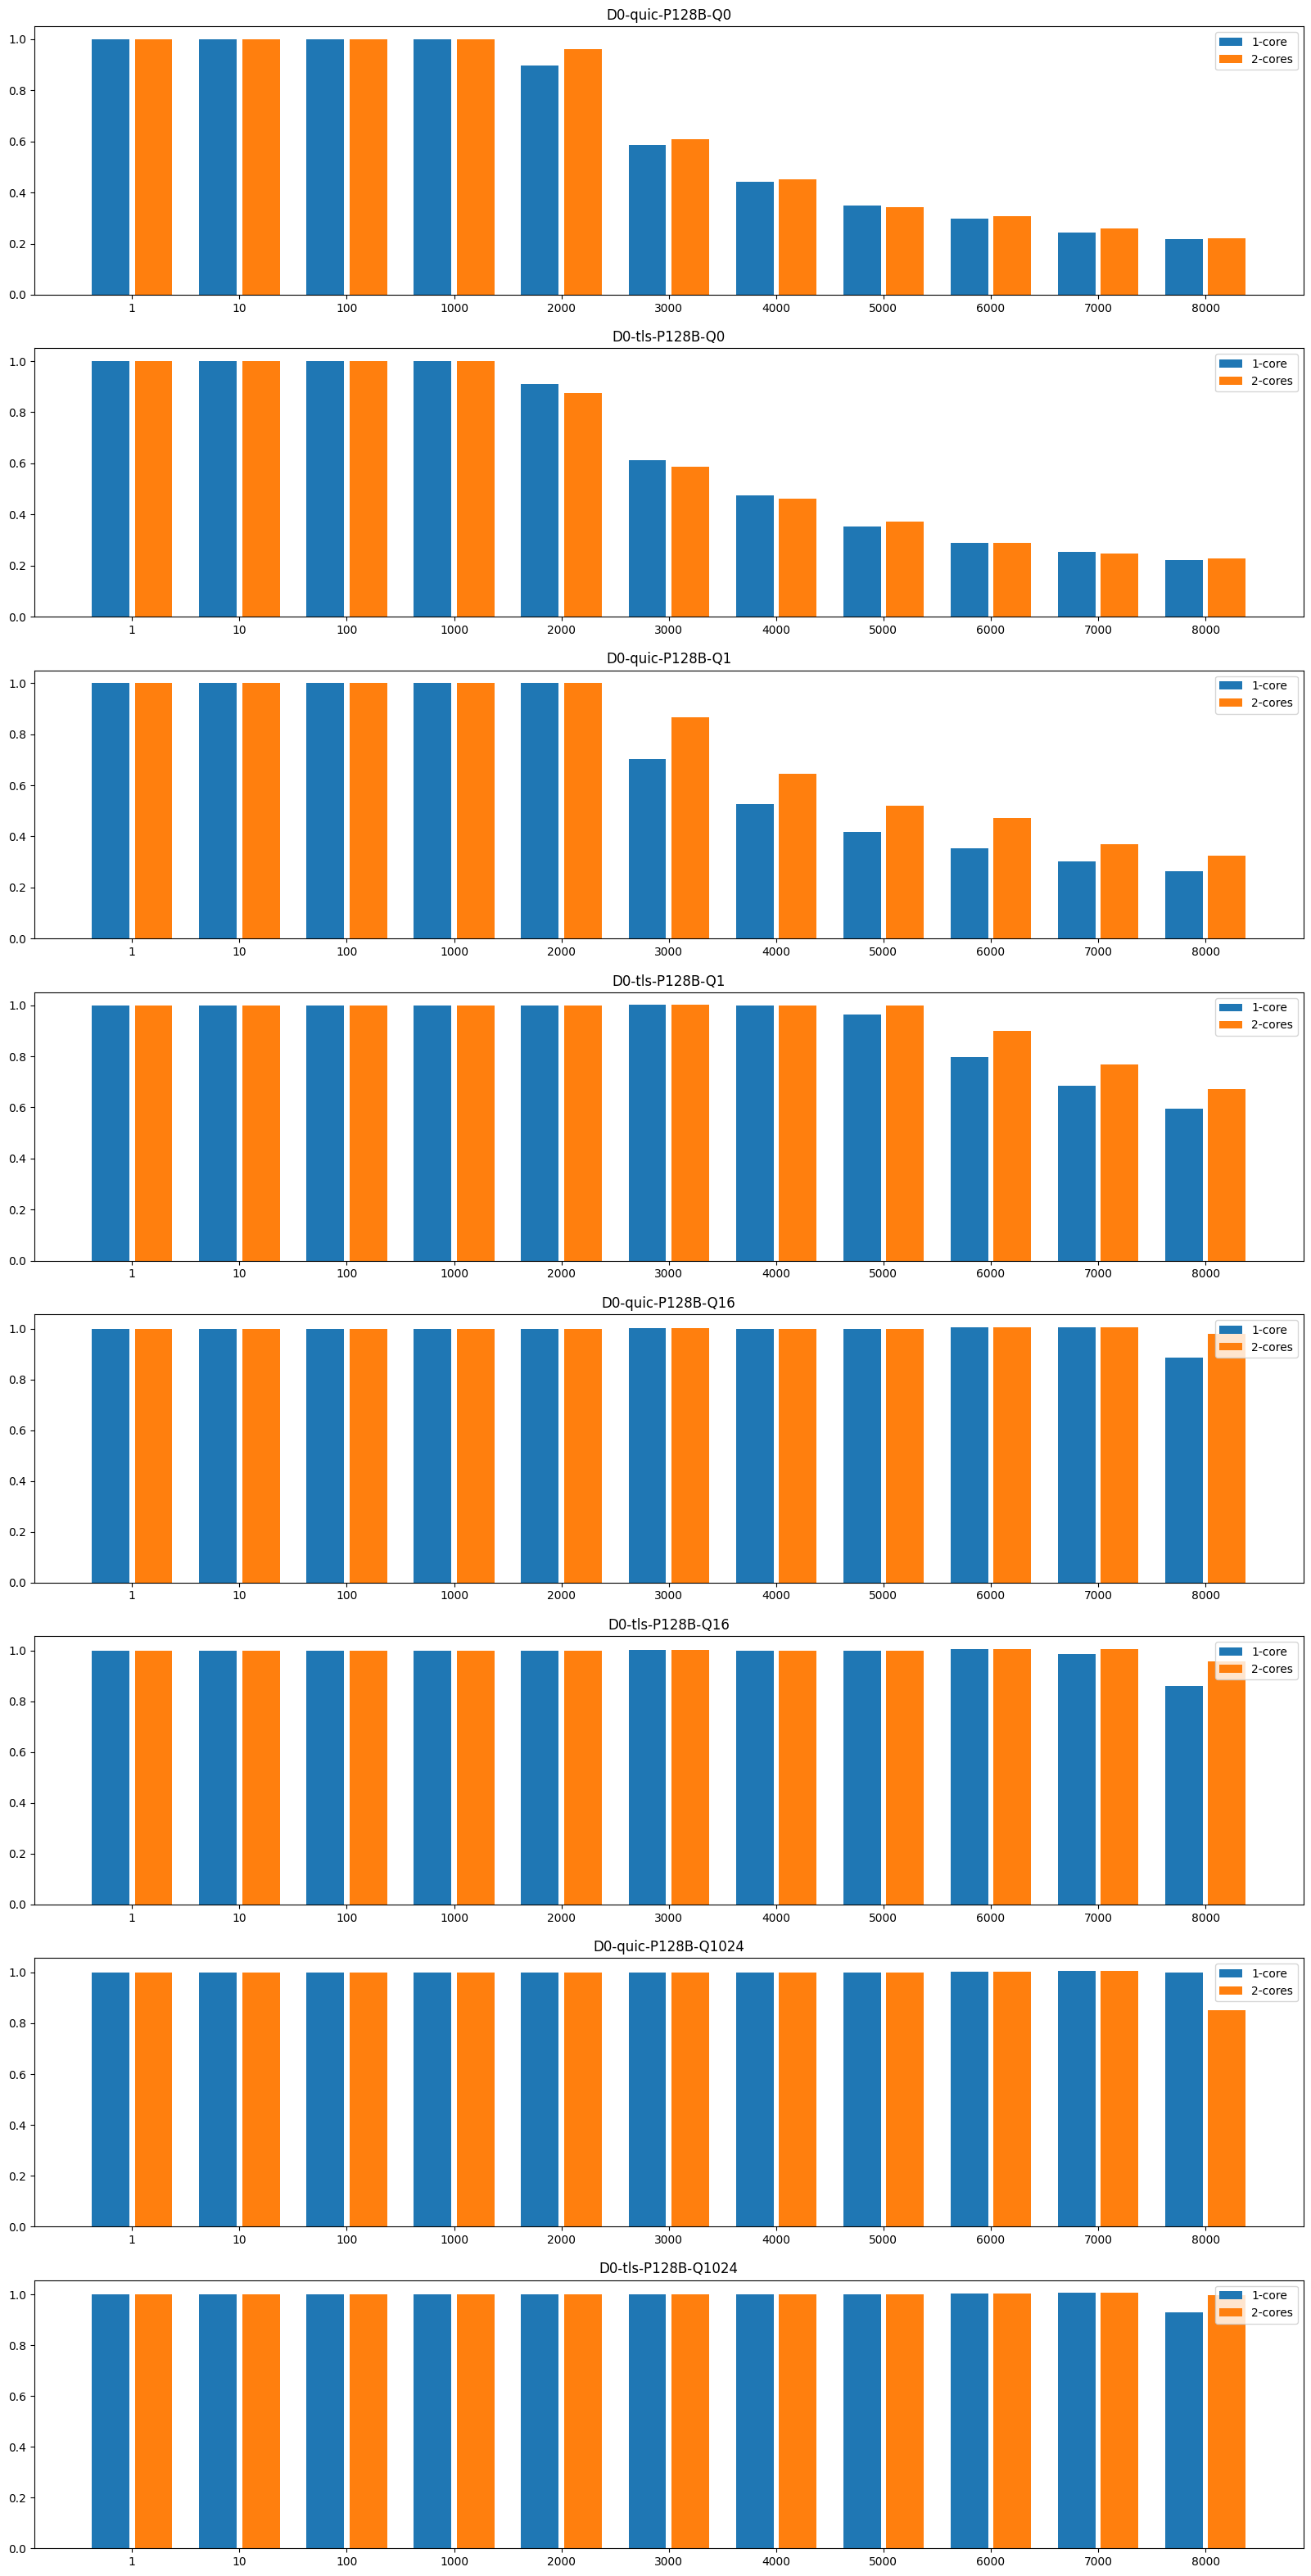

In [202]:
plot_bars(
    {key: [tr / rate for (tr, rate) in zip(core_1_series['true_rate'][key][0], RATE)] for key in core_1_series['true_rate'].keys()},
    {key: [tr / rate for (tr, rate) in zip(core_2_series['true_rate'][key][0], RATE)] for key in core_1_series['true_rate'].keys()}
)